# Analise dos dados da PED

Jupyter Notebook para analisar os dados da Pesquisa de Emprego e Desemprego conforme estão em `raw/DIEPS/bases/ped-parquet/NovaPEDDF2018.parquet`.

## Leitura do MinIO

Leitura de todos os arquivos carregados do MinIO.

In [1]:
import pyarrow.dataset as pds
import pyarrow.parquet as pq
import pyarrow as pa
import s3fs
import pandas as pd

In [ ]:
ACCESS_KEY = ''
SECRET_KEY = ''
MINIO_HOST = 'http://minio:9000'

In [8]:
minio = s3fs.S3FileSystem(key=ACCESS_KEY, # change default key 
                        secret=SECRET_KEY, # change default secret
                        use_ssl=False,
                        client_kwargs={
                            'endpoint_url': MINIO_HOST} # change ip
                        )

# Verifiacação da conexão 
objects = minio.head('raw/DIEPS/bases/ped-parquet')
objects

b''

## Carregamento em dataframe

Os arquivos parquet listados acima serão carregados em um único dataframe.

In [9]:
from io import BytesIO
fs = s3fs.core.S3FileSystem()

part = pds.partitioning(
    pa.schema([
        ('year', pa.int16())
    ])
)
dataset = pq.ParquetDataset(
    'raw/DIEPS/bases/ped-parquet',
    filesystem=minio,
    partitioning=part
)


# dt = dataset.to_table()
# dt
dataset.files

['raw/DIEPS/bases/ped-parquet/2016/NovaPEDDF2016.parquet',
 'raw/DIEPS/bases/ped-parquet/2017/NovaPEDDF2017.parquet',
 'raw/DIEPS/bases/ped-parquet/2018/NovaPEDDF2018.parquet',
 'raw/DIEPS/bases/ped-parquet/2019/NovaPEDDF2019.parquet',
 'raw/DIEPS/bases/ped-parquet/2020/NovaPEDDF2020.parquet',
 'raw/DIEPS/bases/ped-parquet/2021/NovaPEDDF2021.parquet',
 'raw/DIEPS/bases/ped-parquet/2022/NovaPEDDF2022.parquet',
 'raw/DIEPS/bases/ped-parquet/2023/NovaPEDDF2023.parquet']

In [10]:
fields = []
for field in dataset.schema:
    fields.append(field.name)
del fields[83]
fields

['DOMIC',
 'FAMILIA',
 'PESSOA',
 'GRUPO',
 'CONGLOM',
 'AAMM',
 'FATOR',
 'C000',
 'C030',
 'C040',
 'C050',
 'C061',
 'C062',
 'C070',
 'D010',
 'D0211',
 'D0212',
 'D0221',
 'D0222',
 'D0231',
 'D0232',
 'D0241',
 'D0242',
 'D0251',
 'D0252',
 'M010',
 'M02M',
 'M02A',
 'M031',
 'M032',
 'M04M',
 'M04A',
 'M051',
 'M052',
 'E010',
 'E020',
 'E030',
 'E041',
 'E042',
 'E043',
 'F010',
 'F020',
 'F030',
 'F040',
 'F050',
 'F06D',
 'F06S',
 'F06M',
 'F070',
 'F080',
 'F090',
 'F100',
 'F11D',
 'F11M',
 'F11A',
 'F120',
 'F130',
 'F14D',
 'F14M',
 'F14A',
 'F150',
 'F160',
 'F170',
 'F180',
 'F190',
 'F201',
 'F202',
 'F210',
 'F220',
 'F230',
 'F240',
 'F250',
 'F260',
 'F270',
 'F280',
 'F290',
 'F30D',
 'F30M',
 'F30A',
 'F31D',
 'F31M',
 'F31A',
 'F320',
 'F332',
 'F333',
 'F334',
 'F335',
 'F340',
 'F350',
 'F360',
 'F370',
 'F38D',
 'F38M',
 'F38A',
 'F390',
 'F40D',
 'F40M',
 'F40A',
 'F410',
 'F42D',
 'F42M',
 'F42A',
 'F430',
 'F440',
 'F45D',
 'F45M',
 'F45A',
 'F46011',
 'F46

In [ ]:
# Converte para pandas
fields_final = fields[0:82] + fields[83:]
len(fields_final)

df = dataset.read(columns=fields_final).to_pandas()
df.head()

,DOMIC,FAMILIA,PESSOA,GRUPO,CONGLOM,AAMM,FATOR,C000,C030,C040,...,POS,CNAE,SETOR_CNAE,INST,INFLATORDF,SM,TOTFAM,TOTMORA,TAMFAM,year
0,240020.0,1.0,1.0,Alta Renda,2.800000e+10,201607.0,964.693821,Apenas um morador,Masculino,Branca,...,Empregador,"Informação e Comunicação; Ativid. Financeiras,...",Serviços,Ensino Superior Completo,275.12,880.0,1.0,3.0,3.0,2016
1,240020.0,1.0,2.0,Alta Renda,2.800000e+10,201607.0,964.693821,Apenas um morador,Feminino,Branca,...,Ass Pub,"Administração Pública, Defesa e Seguridade Soc...",Serviços,Ensino Superior Completo,275.12,880.0,1.0,3.0,3.0,2016
2,240020.0,1.0,3.0,Alta Renda,2.800000e+10,201607.0,964.693821,Apenas um morador,Masculino,Branca,...,Outros,"Informação e Comunicação; Ativid. Financeiras,...",Serviços,Ensino Superior Completo,275.12,880.0,1.0,3.0,3.0,2016
3,240070.0,1.0,1.0,Alta Renda,2.800000e+10,201607.0,964.693821,Apenas um morador,Feminino,Branca,...,Ass Priv S Cart,"Informação e Comunicação; Ativid. Financeiras,...",Serviços,Pós graduação,275.12,880.0,1.0,2.0,2.0,2016
4,240070.0,1.0,2.0,Alta Renda,2.800000e+10,201607.0,1138.998653,Apenas um morador,Masculino,Branca,...,Não ocupado,Não ocupado,Não ocupado,Ensino Fundamental Incompleto,275.12,880.0,1.0,2.0,2.0,2016


# Analise

Gráficos para análise e possível identificação de indicadores nos dados

In [ ]:
# Converte os valores 1000000000 para NaN
import numpy as np
df2 = df.copy()

In [ ]:
df2['D010'] = df2['D010'].replace('Não se aplica', np.nan)
df2['D010'].dropna(inplace=True)
df2[['D010', 'year']]

/tmp/ipykernel_24110/505083082.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2['D010'] = df2['D010'].replace('Não se aplica', np.nan)


,D010,year
0,NaN,2016
1,NaN,2016
2,Não,2016
3,Não,2016
4,NaN,2016
...,...,...
460877,NaN,2023
460878,Não,2023
460879,NaN,2023
460880,Não,2023


Quantidade de pessoas que receberam o bolsa família por sexo e cor entre 2016 e 2023.

In [ ]:
import matplotlib.pyplot as plt

/tmp/ipykernel_24110/51702208.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby(['Cor','Sexo'])['D010'].agg('count').unstack('Sexo').plot.bar(color=pastel_colors, ax=plt.gca())


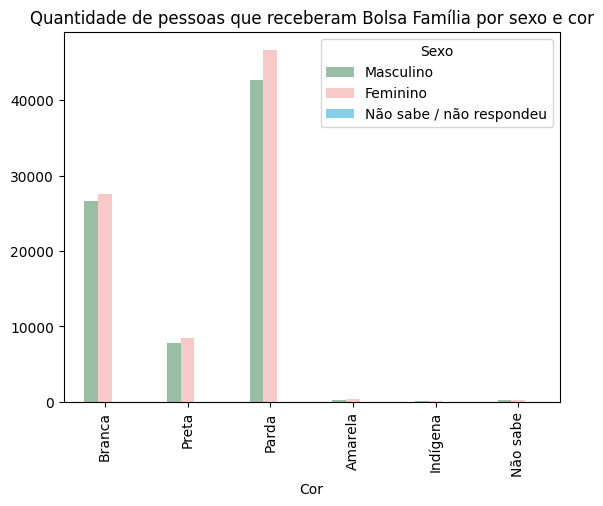

In [ ]:

# Cores
pastel_colors = ['#98BFA5', '#F7CAC9', '#87CEEB', '#ADD8E6', '#D2B48C']

# Renomeia as colunas
df2.rename(columns={
    'C040': 'Cor',
    'C030': 'Sexo',
    'year': 'Ano'
}, inplace=True)

# Realiza o agupamento por cor e sexo
fig = plt.figure(dpi=100)
df2.groupby(['Cor','Sexo'])['D010'].agg('count').unstack('Sexo').plot.bar(color=pastel_colors, ax=plt.gca())

# Apresenta o gráfico
plt.title('Quantidade de pessoas que receberam Bolsa Família por sexo e cor')
plt.show()


Quantidade de pessoas que receberam bolsa família por cor, por ano.


/tmp/ipykernel_24110/3677184356.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby(['Cor','Ano'])['D010'].agg('count').unstack('Cor').plot.line(color=pastel_colors, ax=plt.gca())


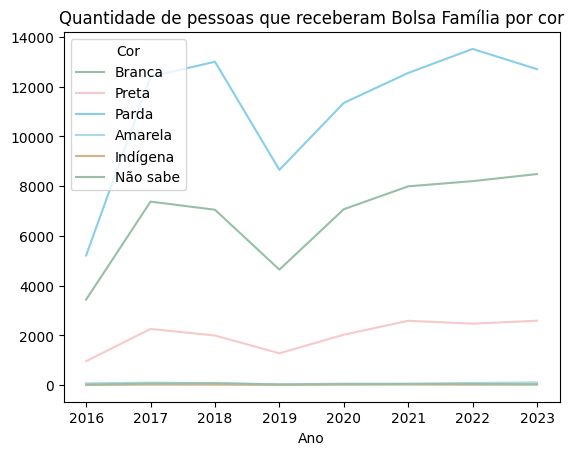

In [ ]:
# Cores
pastel_colors = ['#98BFA5', '#F7CAC9', '#87CEEB', '#ADD8E6', '#D2B48C']

fig = plt.figure(dpi=100)
df2.groupby(['Cor','Ano'])['D010'].agg('count').unstack('Cor').plot.line(color=pastel_colors, ax=plt.gca())
plt.title('Quantidade de pessoas que receberam Bolsa Família por cor')
plt.show()
